# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [80]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [81]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | saint-memmie
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | pariaman
Processing Record 6 of Set 1 | altai
Processing Record 7 of Set 1 | magadan
Processing Record 8 of Set 1 | mugia
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | horta
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | nikolayevsk-on-amure
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | gloucester
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | port lincoln


In [83]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df  = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [84]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.46,78,99,3.22,PN,1704332821
1,saint-memmie,48.9525,4.3841,10.01,78,97,9.26,FR,1704332821
2,blackmans bay,-43.0167,147.3167,18.18,69,35,0.45,AU,1704332822
3,port-aux-francais,-49.3500,70.2167,4.47,68,69,14.49,TF,1704332822
4,pariaman,-0.6190,100.1200,28.03,82,98,0.87,ID,1704332822


In [85]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.46,78,99,3.22,PN,1704332821
1,saint-memmie,48.9525,4.3841,10.01,78,97,9.26,FR,1704332821
2,blackmans bay,-43.0167,147.3167,18.18,69,35,0.45,AU,1704332822
3,port-aux-francais,-49.3500,70.2167,4.47,68,69,14.49,TF,1704332822
4,pariaman,-0.6190,100.1200,28.03,82,98,0.87,ID,1704332822


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

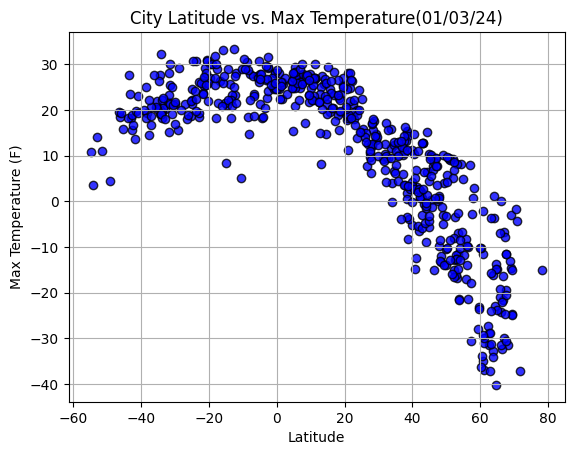

In [87]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
tmp = city_data_df["Max Temp"]
plt.scatter(lat,tmp, color = 'blue', edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

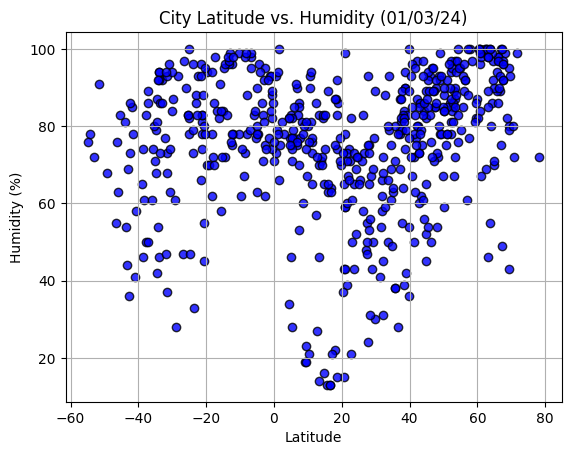

In [88]:
# Build the scatter plots for latitude vs. humidity
hum = city_data_df["Humidity"]
plt.scatter(lat,hum, color = 'blue', edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

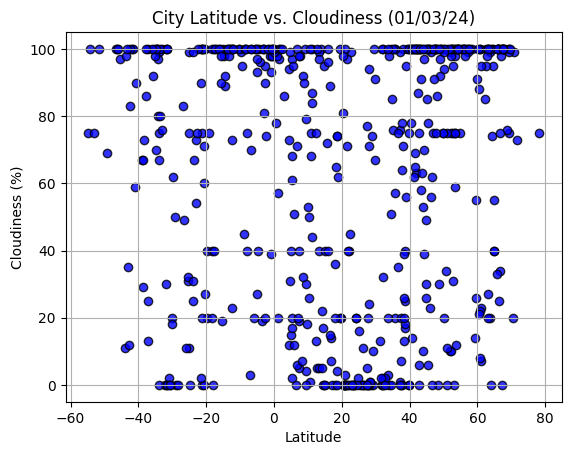

In [89]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df["Cloudiness"]
plt.scatter(lat,cloud, color = 'blue', edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

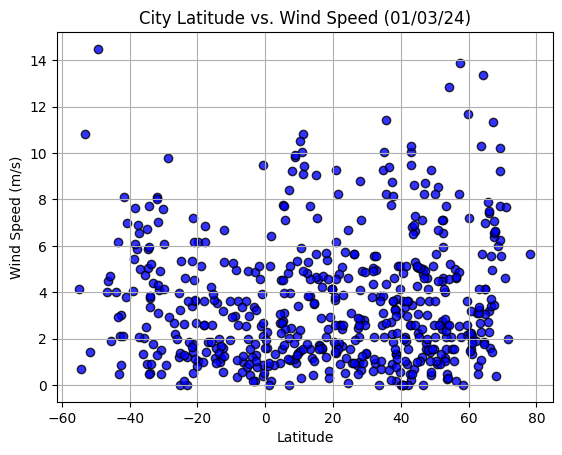

In [90]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(lat,wind, color = 'blue', edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values,y_values,x_label,y_label,title,x_coord,y_coord):
   (slope, intercept, rvalue, pvalue, stderr) = stats.linregress (x_values,y_values)
   regress_values = x_values * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
   plt.scatter(x_values,y_values,color = "blue", edgecolor = "black",marker = 'o')
   plt.plot(x_values, regress_values, "r-")
   plt.xlabel(x_label)
   plt.ylabel(y_label)
   plt.title(title)
   plt.annotate(line_eq,(x_coord,y_coord), fontsize=15, color="red")
   print(f"The r-value is: {rvalue**2}")
   plt.show()

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-memmie,48.9525,4.3841,10.01,78,97,9.26,FR,1704332821
5,altai,46.3722,96.2583,-15.10,50,56,1.20,MN,1704332822
6,magadan,59.5667,150.8000,-23.22,82,55,2.17,RU,1704332823
7,mugia,43.1041,-9.2179,12.73,86,100,10.03,ES,1704332823
8,taoudenni,22.6783,-3.9836,18.08,21,99,5.09,ML,1704332824


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.46,78,99,3.22,PN,1704332821
2,blackmans bay,-43.0167,147.3167,18.18,69,35,0.45,AU,1704332822
3,port-aux-francais,-49.3500,70.2167,4.47,68,69,14.49,TF,1704332822
4,pariaman,-0.6190,100.1200,28.03,82,98,0.87,ID,1704332822
11,waitangi,-43.9535,-176.5597,18.23,81,11,4.02,NZ,1704332825


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7837309452281205


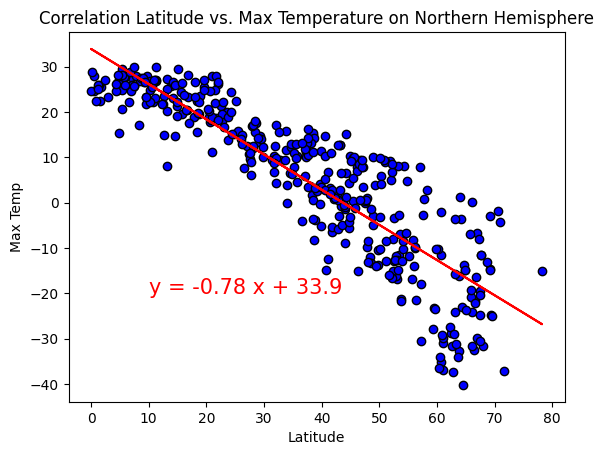

In [95]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values,y_values,'Latitude', 'Max Temp','Correlation Latitude vs. Max Temperature on Northern Hemisphere',10,-20)

The r-value is: 0.24764360348490694


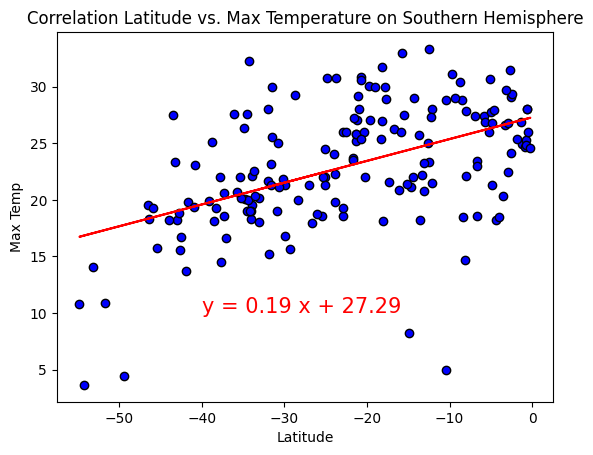

In [97]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot(x_values,y_values,'Latitude', 'Max Temp','Correlation Latitude vs. Max Temperature on Southern Hemisphere',-40,10)

**Discussion about the linear relationship:** Correlation Latitude vs. Max Temperature on Northern Hemisphere is a strong negative . That represent "futher from equator colder the tempearature" behavior . Correlation Latitude vs. Max Temperature on Southern Hemisphere  is very week positive. In this case distanse from equator (latitude) does not affect too much on Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16192894405275227


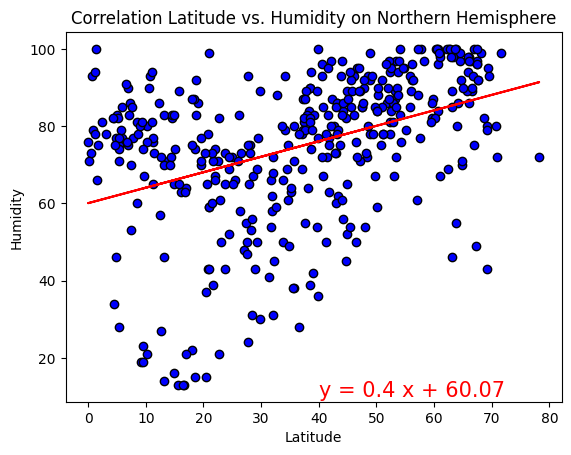

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot(x_values,y_values,'Latitude', 'Humidity','Correlation Latitude vs. Humidity on Northern Hemisphere',40,10)

The r-value is: 0.1112983501331525


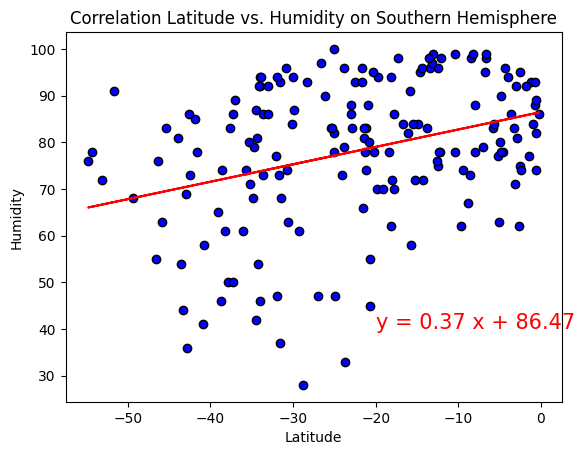

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot(x_values,y_values,'Latitude', 'Humidity','Correlation Latitude vs. Humidity on Southern Hemisphere',-20,40)

**Discussion about the linear relationship:** Humidity has weak positive correlations for both semispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09177049335334508


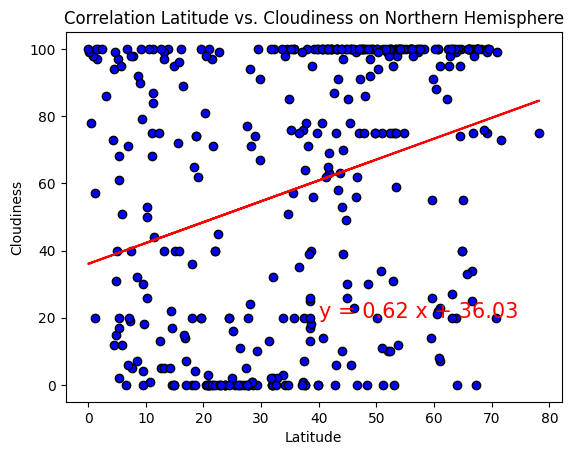

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_values,y_values,'Latitude', 'Cloudiness','Correlation Latitude vs. Cloudiness on Northern Hemisphere',40,20)

The r-value is: 0.013578452099912557


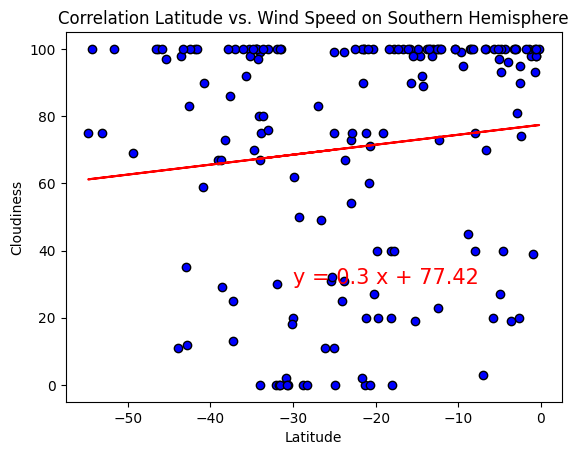

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_values,y_values,'Latitude', 'Cloudiness','Correlation Latitude vs. Wind Speed on Southern Hemisphere',-30,30)

**Discussion about the linear relationship:** Cloudines vs Latitude has moderate positive correlation for Nothern Semosphere and weak positive for South Semosphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011087666339808677


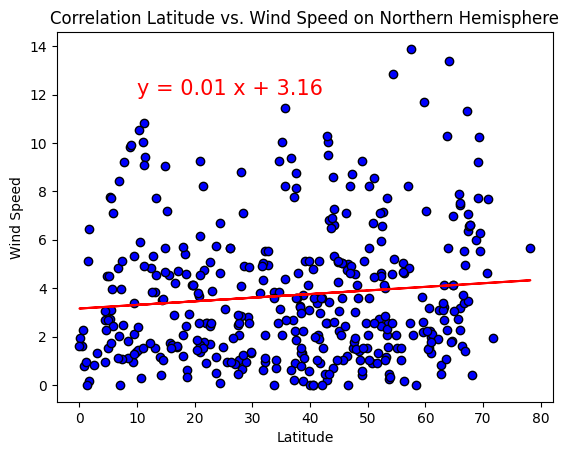

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_values,y_values,'Latitude', 'Wind Speed','Correlation Latitude vs. Wind Speed on Northern Hemisphere',10,12)

The r-value is: 0.10379224766053946


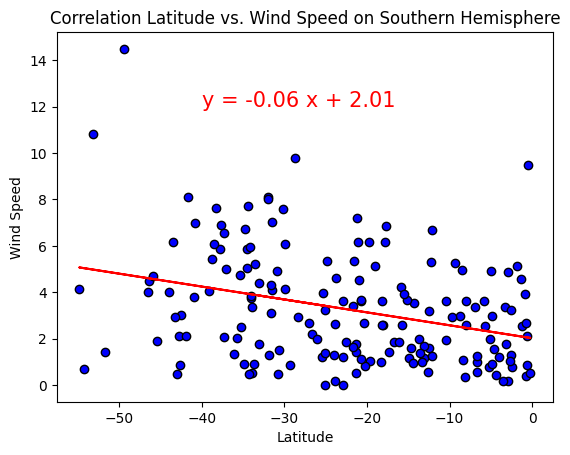

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_values,y_values,'Latitude', 'Wind Speed','Correlation Latitude vs. Wind Speed on Southern Hemisphere',-40,12)

**Discussion about the linear relationship:** Almost none correlations observed for both: South and North semispheres. The differences only that correlation is positive on a North Semisphere and negative on a South Semisphere